In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset
assault = pd.read_excel("Sexual_assault.xlsx")
assault.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,AZE,Azerbaijan,Asia,Western Asia,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,155.0,CTS
1,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,61959.0,CTS
2,BGR,Bulgaria,Europe,Eastern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,3806.0,CTS
3,BHR,Bahrain,Asia,Western Asia,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,2701.0,CTS
4,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Serious assault,Total,Total,2003,Counts,4032.0,CTS


### Data Cleaning

In [3]:
assault.columns

Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension',
       'Category', 'Sex', 'Age', 'Year', 'Unit of measurement', 'VALUE',
       'Source'],
      dtype='object')

In [4]:
assault["Indicator"].unique()


array(['Violent offences', 'Victims of serious assault',
       'Victims of sexual violence'], dtype=object)

In [5]:
assault["Dimension"].unique()

array(['by type of offence', 'by relationship to perpetrator'],
      dtype=object)

In [6]:
assault["Category"].unique()

array(['Serious assault', 'Kidnapping', 'Sexual violence',
       'Sexual violence: Rape', 'Sexual violence: Sexual assault',
       'Sexual violence: Other acts of sexual violence',
       'Sexual Exploitation', 'Intimate partner or family member',
       'Other Perpetrator known to the victim',
       'Perpetrator unknown to the victim',
       'Relationship to perpetrator is not known',
       'Acts intended to induce fear or emotional distress',
       'Acts intended to induce fear or emotional distress: Cyber-related'],
      dtype=object)

In [7]:
print(f"Initial number of rows: {assault.shape[0]}")

Initial number of rows: 26114


In [8]:
print(assault.isnull().sum())


Iso3_code              0
Country                0
Region                 0
Subregion              0
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
VALUE                  0
Source                 0
dtype: int64


In [9]:
print(assault.isnull().values.any())


False


In [10]:
# Replace string values like ".." or "n.a." with NaN, and convert to numeric
assault['VALUE'] = pd.to_numeric(assault['VALUE'], errors='coerce')

# Drop rows where VALUE is missing
assault = assault.dropna(subset=['VALUE'])

print("✅ Step 4: Cleaned and converted 'VALUE' column to numeric")
print(f"Rows remaining after removing NaN in VALUE: {assault.shape[0]}")


✅ Step 4: Cleaned and converted 'VALUE' column to numeric
Rows remaining after removing NaN in VALUE: 26114


In [11]:
# Reload fresh dataset
assault= pd.read_excel('Sexual_assault.xlsx')

# Define sexual categories that are safe to include regardless of Indicator
explicit_sexual_categories = [
    'Sexual violence',
    'Sexual violence: Rape',
    'Sexual violence: Sexual assault',
    'Sexual violence: Other acts of sexual violence',
    'Sexual Exploitation'
]

# Define perpetrator categories to include ONLY if Indicator is 'Victims of sexual violence'
perpetrator_categories = [
    'Intimate partner or family member',
    'Other Perpetrator known to the victim',
    'Perpetrator unknown to the victim',
    'Relationship to perpetrator is not known'
]

# Build two filters and combine
condition_explicit = assault['Category'].isin(explicit_sexual_categories)

condition_perp = (
    (assault['Indicator'] == 'Victims of sexual violence') &
    (assault['Category'].isin(perpetrator_categories))
)

# Combine both into final filtered DataFrame
filtered_assault = assault[condition_explicit | condition_perp]

# Show what we kept
print("✅ Rows retained after dual-filtering:")
print(filtered_assault.shape[0])
print("\nCategories retained:")
print(filtered_assault['Category'].value_counts())
print("\nIndicator breakdown:")
print(filtered_assault['Indicator'].value_counts())


✅ Rows retained after dual-filtering:
14540

Categories retained:
Category
Sexual violence: Rape                             4006
Sexual violence                                   3536
Sexual violence: Sexual assault                   1740
Sexual violence: Other acts of sexual violence    1098
Sexual Exploitation                                994
Intimate partner or family member                  922
Relationship to perpetrator is not known           822
Perpetrator unknown to the victim                  720
Other Perpetrator known to the victim              702
Name: count, dtype: int64

Indicator breakdown:
Indicator
Violent offences              11374
Victims of sexual violence     3166
Name: count, dtype: int64


In [12]:
filtered_assault.rename(columns={'Unit of measurement': 'Unit_of_measurement'}, inplace=True)
filtered_assault.rename(columns={'VALUE': 'Value'}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20840\3912641852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_assault.rename(columns={'Unit of measurement': 'Unit_of_measurement'}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20840\3912641852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_assault.rename(columns={'VALUE': 'Value'}, inplace=True)


In [13]:
filtered_assault.columns

Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension',
       'Category', 'Sex', 'Age', 'Year', 'Unit_of_measurement', 'Value',
       'Source'],
      dtype='object')

In [14]:
filtered_assault.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source
3796,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2003,Counts,5565.0,CTS
3797,BGR,Bulgaria,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2003,Counts,1287.0,CTS
3798,CAN,Canada,Americas,Northern America,Violent offences,by type of offence,Sexual violence,Total,Total,2003,Counts,26128.0,CTS
3799,CZE,Czechia,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2003,Counts,1898.0,CTS
3800,DEU,Germany,Europe,Western Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2003,Counts,54632.0,CTS


In [15]:
print("Years available:", filtered_assault['Year'].unique())
print("Countries available:", filtered_assault['Country'].nunique())
print("Sex values:", filtered_assault['Sex'].unique())
print("Categories:", filtered_assault['Category'].unique())


Years available: [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022]
Countries available: 157
Sex values: ['Total' 'Male' 'Female']
Categories: ['Sexual violence' 'Sexual violence: Rape'
 'Sexual violence: Sexual assault'
 'Sexual violence: Other acts of sexual violence' 'Sexual Exploitation'
 'Intimate partner or family member'
 'Other Perpetrator known to the victim'
 'Perpetrator unknown to the victim'
 'Relationship to perpetrator is not known']


In [16]:
trafficking = pd.read_excel('human_trafficking.xlsx')

trafficking.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source
0,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP
1,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP
2,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP
3,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP


In [17]:
# ✅ Convert 'txtVALUE' to numeric and handle errors like '<5' by coercing to NaN
trafficking['txtVALUE'] = pd.to_numeric(trafficking['txtVALUE'], errors='coerce')

# ✅ Drop rows where 'txtVALUE' is missing (e.g., after coercing '<5' to NaN)
initial_rows = trafficking.shape[0]
trafficking = trafficking.dropna(subset=['txtVALUE'])
print(f"Dropped rows with missing txtVALUE: {initial_rows - trafficking.shape[0]}")
print(f"Remaining rows after cleaning 'txtVALUE': {trafficking.shape[0]}")

# ✅ Rename 'txtVALUE' to 'Value' for consistency with your assault dataset
trafficking.rename(columns={'txtVALUE': 'Value'}, inplace=True)
print("Renamed 'txtVALUE' column to 'Value'")


Dropped rows with missing txtVALUE: 30371
Remaining rows after cleaning 'txtVALUE': 28398
Renamed 'txtVALUE' column to 'Value'


In [18]:
trafficking.rename(columns={'Unit of measurement': 'Unit_of_measurement'}, inplace=True)

In [19]:
trafficking.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source
3,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103.0,GLOTIP
4,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167.0,GLOTIP
12,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,Total,Total,Total,0 to 17 years,2009,Counts,15.0,GLOTIP
14,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,Total,Total,Total,Total,2009,Counts,15.0,GLOTIP
15,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2009,Counts,15.0,GLOTIP


In [20]:
# View unique values in 'Indicator' column
print("📌 Unique values in 'Indicator':")
print(trafficking['Indicator'].unique())

print("\n📌 Unique values in 'Category':")
print(trafficking['Category'].unique())


📌 Unique values in 'Indicator':
['Offences of trafficking in persons'
 'Persons brought into formal contact' 'Detected trafficking victims'
 'Persons prosecuted' 'Persons convicted']

📌 Unique values in 'Category':
['Total' 'Sexual exploitation' 'Nationals' 'Forced labour' 'Angolan'
 'Congolese (DRC)' 'Nigerians' 'Chinese' 'Albania' nan 'Abroad'
 'Bangladesh' 'Uzbekistan' 'Iraq' 'India' 'Indonesia' 'Lebanon'
 'Philippines' 'Thailand' 'Kazakhstan' 'Republic of Moldova' 'Tajikistan'
 'Pakistan' 'Tunisia' 'Armenia' 'Azerbaijan' 'Kyrgyzstan' 'Nigeria'
 'Uganda' 'Argentina' 'Bolivia (Plurinational State of)' 'Paraguay' 'Peru'
 'China' 'Dominican Republic' 'Colombia' 'ARGENTINA' 'BOLIVIA' 'BRASIL'
 'OTROS' 'PARAGUAY' 'PERU' 'R.DOMINICANA' 'Bolivia' 'Chile' 'R.Dominicana'
 'Uruguay' 'Venezuela' 'Brasil' 'Senegal' 'Ciudadanos de su pa�s'
 'Corea del Sur' 'Ecuador' 'R.dominicana' 'Russian Federation'
 'Republic of Korea' 'Malaysia' 'Unknown' 'Australia' 'Afghanistan'
 'Afghani' 'Australians' 'F

In [21]:
# Filter for trafficking records related to Sexual Exploitation only
trafficking = trafficking[trafficking['Category'] == 'Sexual exploitation']
print("✅ Rows retained for category 'Sexual Exploitation':", trafficking.shape[0])


✅ Rows retained for category 'Sexual Exploitation': 3036


In [22]:
trafficking.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source
15,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2009,Counts,15.0,GLOTIP
183,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Female,0 to 17 years,2020,Counts,8.0,GLOTIP
187,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,0 to 17 years,2020,Counts,8.0,GLOTIP
189,AGO,Angola,Africa,Sub-Saharan Africa,Detected trafficking victims,by form of exploitation,Sexual exploitation,Total,Total,2020,Counts,8.0,GLOTIP
207,AGO,Angola,Africa,Sub-Saharan Africa,Persons convicted,by form of exploitation,Sexual exploitation,Total,Total,2020,Counts,8.0,GLOTIP


In [23]:
# Check number of missing values in each column
print("🔍 Missing values in filtered trafficking dataset:")
print(trafficking.isnull().sum())

🔍 Missing values in filtered trafficking dataset:
Iso3_code              0
Country                0
Region                 0
Subregion              0
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit_of_measurement    0
Value                  0
Source                 0
dtype: int64


In [24]:
print("Categories:", trafficking['Category'].unique())

Categories: ['Sexual exploitation']


In [25]:
trafficking.columns

Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension',
       'Category', 'Sex', 'Age', 'Year', 'Unit_of_measurement', 'Value',
       'Source'],
      dtype='object')

In [26]:
# ✅ Group by country and year to get total cases per combination
trafficking_summary = trafficking.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# ✅ Rename column for clarity
trafficking_summary.rename(columns={'Value': 'Trafficking_cases'}, inplace=True)

# Preview result
print("📊 Trafficking summary (Sexual exploitation only):")
print(trafficking_summary.head())


📊 Trafficking summary (Sexual exploitation only):
   Country  Year  Trafficking_cases
0  Albania  2005               62.0
1  Albania  2006               57.0
2  Albania  2007                9.0
3  Albania  2008              124.0
4  Albania  2009              101.0


In [27]:
# Check number of missing values in each column
print("🔍 Missing values in filtered and aggregated trafficking dataset:")
print(trafficking_summary.isnull().sum())

🔍 Missing values in filtered and aggregated trafficking dataset:
Country              0
Year                 0
Trafficking_cases    0
dtype: int64


In [28]:
# ✅ Merge assault and trafficking data on country & year
merged_trafficking = pd.merge(filtered_assault, trafficking_summary, on=['Country', 'Year'], how='left')

# ✅ Check how many rows successfully merged
print("Merged dataset shape:", merged_trafficking.shape)
print("Missing trafficking data after merge:", merged_trafficking['Trafficking_cases'].isna().sum())

# Preview merged data
print(merged_trafficking.head())


Merged dataset shape: (14540, 14)
Missing trafficking data after merge: 6504
  Iso3_code   Country    Region         Subregion         Indicator  \
0       BEL   Belgium    Europe    Western Europe  Violent offences   
1       BGR  Bulgaria    Europe    Eastern Europe  Violent offences   
2       CAN    Canada  Americas  Northern America  Violent offences   
3       CZE   Czechia    Europe    Eastern Europe  Violent offences   
4       DEU   Germany    Europe    Western Europe  Violent offences   

            Dimension         Category    Sex    Age  Year  \
0  by type of offence  Sexual violence  Total  Total  2003   
1  by type of offence  Sexual violence  Total  Total  2003   
2  by type of offence  Sexual violence  Total  Total  2003   
3  by type of offence  Sexual violence  Total  Total  2003   
4  by type of offence  Sexual violence  Total  Total  2003   

  Unit_of_measurement    Value Source  Trafficking_cases  
0              Counts   5565.0    CTS                NaN  
1    

In [29]:
# Unique country names from both datasets
assault_countries = set(filtered_assault['Country'].unique())
trafficking_countries = set(trafficking_summary['Country'].unique())

# Compare the two
common = assault_countries & trafficking_countries
assault_only = assault_countries - trafficking_countries
trafficking_only = trafficking_countries - assault_countries

print("Common countries:", len(common))
print("In assault only:", sorted(assault_only))
print("In trafficking only:", sorted(trafficking_only))


Common countries: 115
In assault only: ['Algeria', 'Andorra', 'Antigua and Barbuda', 'Belize', 'Bermuda', 'Bhutan', 'Botswana', 'Burundi', 'Cabo Verde', 'Cameroon', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Dominica', 'Eswatini', 'Grenada', 'Guinea-Bissau', 'Haiti', 'Holy See', 'India', 'Iraq (Central Iraq)', 'Kosovo under UNSCR 1244', 'Liechtenstein', 'Maldives', 'New Zealand', 'Puerto Rico', 'Republic of Korea', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Senegal', 'State of Palestine', 'Sudan', 'Syrian Arab Republic', 'Timor-Leste', 'Turkmenistan', 'United Kingdom (England and Wales)', 'United Kingdom (Northern Ireland)', 'United Kingdom (Scotland)', 'United Republic of Tanzania', 'Yemen', 'Zimbabwe']
In trafficking only: ['Angola', 'Burkina Faso', 'Cambodia', 'China', 'Cuba', 'Democratic Republic of the Congo', 'Fiji', 'Gambia', 'Iraq', 'Liberia', 'Mali', 'Mauritania', '

In [30]:
merged_trafficking = pd.merge(filtered_assault, trafficking_summary, on=['Country', 'Year'], how='left')
print("Re-merged dataset shape:", merged_trafficking.shape)
print("Missing trafficking data after country name fix:", merged_trafficking['Trafficking_cases'].isna().sum())


Re-merged dataset shape: (14540, 14)
Missing trafficking data after country name fix: 6504


In [31]:
print(sorted(trafficking_summary['Country'].unique()))


['Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Côte d’Ivoire', 'Democratic Republic of the Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozam

In [32]:
print(sorted(filtered_assault['Country'].unique()))


['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Côte d’Ivoire', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq (Central Iraq)', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo under UNSC

In [33]:
# Get all country-year pairs in filtered_assault
assault_pairs = set(zip(filtered_assault['Country'], filtered_assault['Year']))

# Get all country-year pairs in trafficking_summary
trafficking_pairs = set(zip(trafficking_summary['Country'], trafficking_summary['Year']))

# Find which country-year pairs exist in assault but not in trafficking
unmatched_pairs = assault_pairs - trafficking_pairs

print(f"Unmatched (Country, Year) pairs: {len(unmatched_pairs)}")
print(list(unmatched_pairs)[:10])  # Show a sample


Unmatched (Country, Year) pairs: 1188
[('Russian Federation', 2006), ('Uruguay', 2010), ('Russian Federation', 2015), ('Italy', 2011), ('Saudi Arabia', 2016), ('Dominica', 2018), ('Ireland', 2006), ('Nicaragua', 2010), ('Saint Kitts and Nevis', 2017), ('Netherlands (Kingdom of the)', 2004)]


In [34]:
# ✅ Keep only rows with known trafficking data
merged_clean = merged_trafficking.dropna(subset=['Trafficking_cases'])

# 🧾 Check shape
print("Final cleaned dataset for modeling:", merged_clean.shape)

# Preview
merged_clean.head()


Final cleaned dataset for modeling: (8036, 14)


,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source,Trafficking_cases
30,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,775.0,CTS,400.0
47,HRV,Croatia,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,485.0,CTS,14.0
75,ALB,Albania,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,89.0,CTS,62.0
78,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,6047.0,CTS,69.0
81,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,819.0,CTS,365.0


### **Exlanatory Data Analysis**

In [35]:
# View dataset structure
print("Dataset shape:", merged_clean.shape)
print("\n Column info:")
print(merged_clean.info())

# First few rows
print("\n Sample rows:")
display(merged_clean.head())


Dataset shape: (8036, 14)

 Column info:
<class 'pandas.core.frame.DataFrame'>
Index: 8036 entries, 30 to 14539
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iso3_code            8036 non-null   object 
 1   Country              8036 non-null   object 
 2   Region               8036 non-null   object 
 3   Subregion            8036 non-null   object 
 4   Indicator            8036 non-null   object 
 5   Dimension            8036 non-null   object 
 6   Category             8036 non-null   object 
 7   Sex                  8036 non-null   object 
 8   Age                  8036 non-null   object 
 9   Year                 8036 non-null   int64  
 10  Unit_of_measurement  8036 non-null   object 
 11  Value                8036 non-null   float64
 12  Source               8036 non-null   object 
 13  Trafficking_cases    8036 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source,Trafficking_cases
30,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,775.0,CTS,400.0
47,HRV,Croatia,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,485.0,CTS,14.0
75,ALB,Albania,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,89.0,CTS,62.0
78,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,6047.0,CTS,69.0
81,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,819.0,CTS,365.0


In [36]:
# Check for missing data (if any slipped through)
print("Missing values per column:")
print(merged_clean.isna().sum())


Missing values per column:
Iso3_code              0
Country                0
Region                 0
Subregion              0
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit_of_measurement    0
Value                  0
Source                 0
Trafficking_cases      0
dtype: int64


In [37]:
# Descriptive stats for numerical columns
print("Summary stats:")
print(merged_clean.describe())


Summary stats:
              Year          Value  Trafficking_cases
count  8036.000000    8036.000000        8036.000000
mean   2016.464659    1659.355550         260.271777
std       4.083128    6742.852017         437.728192
min    2003.000000       0.000000           5.000000
25%    2014.000000       4.068948          28.000000
50%    2017.000000      31.133420          84.000000
75%    2020.000000     473.000000         273.000000
max    2022.000000  143765.000000        3969.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_20840\2007929010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


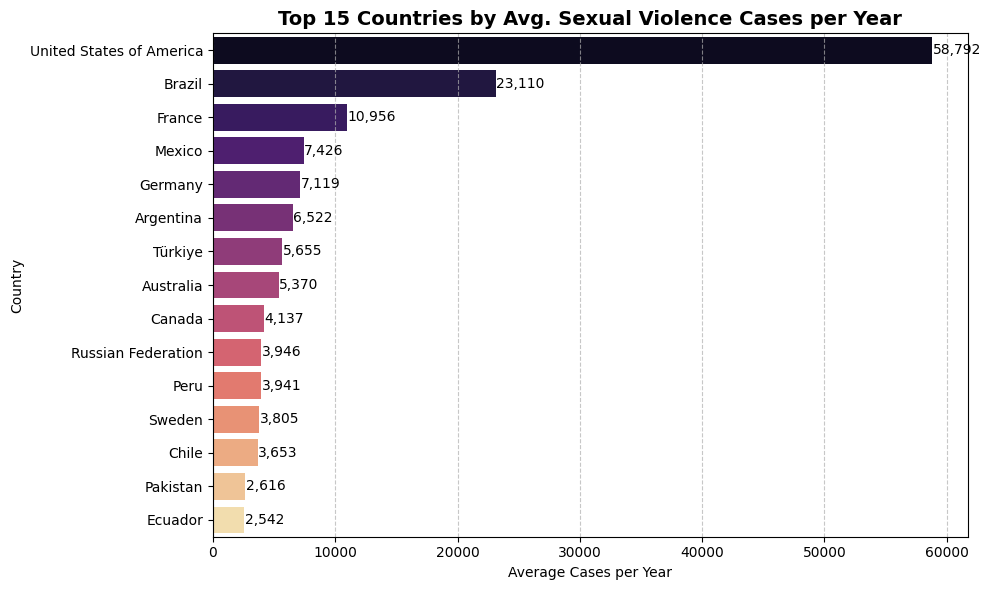

In [38]:
# 📊 Top 15 Countries by Average Sexual Violence Cases 
top_countries = merged_clean.groupby('Country')['Value'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')

# 📍 Add value labels
for index, value in enumerate(top_countries.values):
    plt.text(value + 50, index, f'{int(value):,}', va='center')

# 🖼️ Improved title and labels
plt.title('Top 15 Countries by Avg. Sexual Violence Cases per Year', fontsize=14, weight='bold')
plt.xlabel('Average Cases per Year')
plt.ylabel('Country')

# 📐 Clean grid
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20840\1747891862.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


NameError: name 'ticker' is not defined

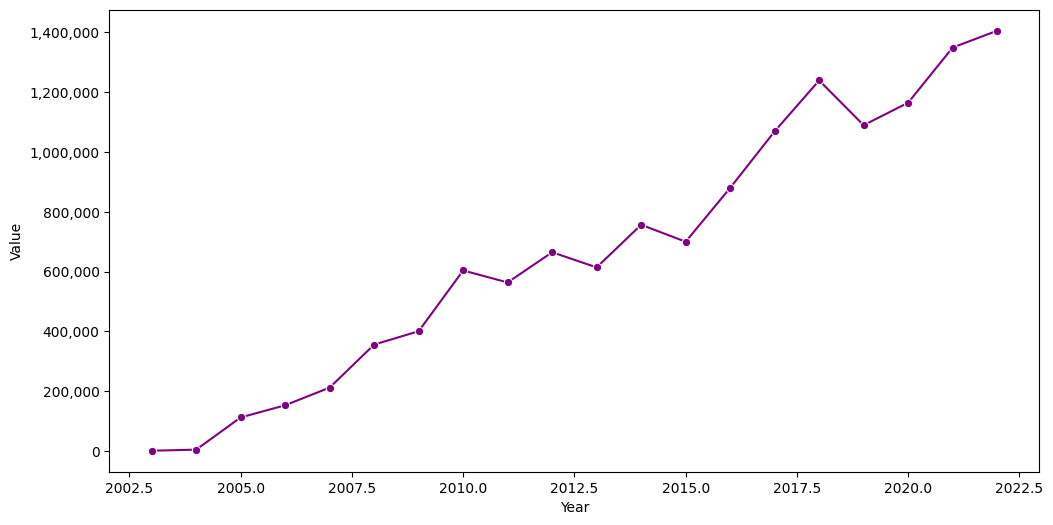

In [39]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=merged_clean,
    x='Year',
    y='Value',
    estimator='sum',
    ci=None,
    color='purple',
    marker='o'
)

# 🔧 Format y-axis to use comma-separated full numbers
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 📅 Remove decimal from x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Total Sexual Violence Cases Reported Over Time', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


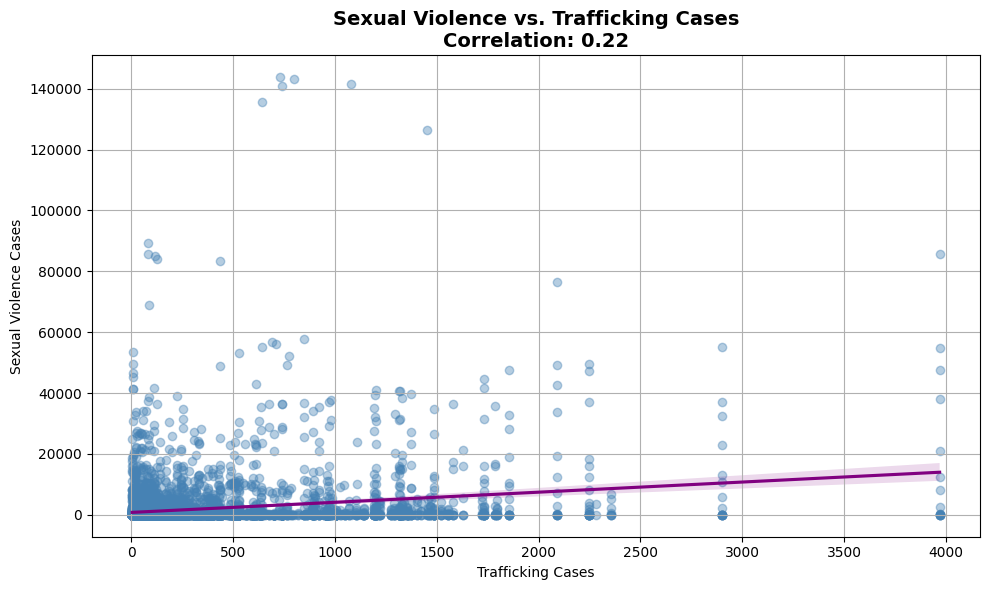

In [ ]:
from scipy.stats import pearsonr

# Drop NaNs
scatter_data = merged_clean.dropna(subset=['Value', 'Trafficking_cases'])


# Calculate correlation
corr, _ = pearsonr(scatter_data['Value'], scatter_data['Trafficking_cases'])

plt.figure(figsize=(10, 6))
sns.regplot(
    data=scatter_data,
    x='Trafficking_cases',
    y='Value',
    scatter_kws={'alpha': 0.4}, 
    line_kws={'color': 'purple'},
    color='steelblue'
)

plt.title(f'Sexual Violence vs. Trafficking Cases\nCorrelation: {corr:.2f}', fontsize=14, weight='bold')
plt.xlabel('Trafficking Cases')
plt.ylabel('Sexual Violence Cases')
plt.tight_layout()
plt.grid(True)
plt.show()


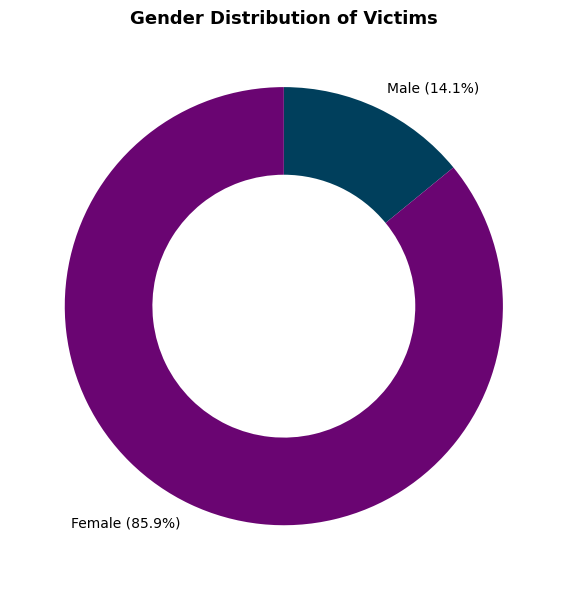

In [ ]:
# 📊 Filter to keep only Male and Female (excluding 'Total')
sex_breakdown = merged_clean[merged_clean['Sex'].isin(['Male', 'Female'])].groupby('Sex')['Value'].sum()

# ✅ Reorder to match desired color assignment (Male: blue, Female: purple)
sex_breakdown = sex_breakdown.reindex(['Male', 'Female'])

# 🎨 Updated color list to match order
colors = ['#003f5c', '#6a0572']  # Blue for Male, Purple for Female

# 🏷️ Labels with percentage formatting
total = sex_breakdown.sum()
labels = [f'{sex} ({value/total:.1%})' for sex, value in sex_breakdown.items()]

# 📈 Donut Chart
plt.figure(figsize=(6, 6))
plt.pie(
    sex_breakdown,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.4)
)

# 🖼️ Title
plt.title('Gender Distribution of Victims', fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


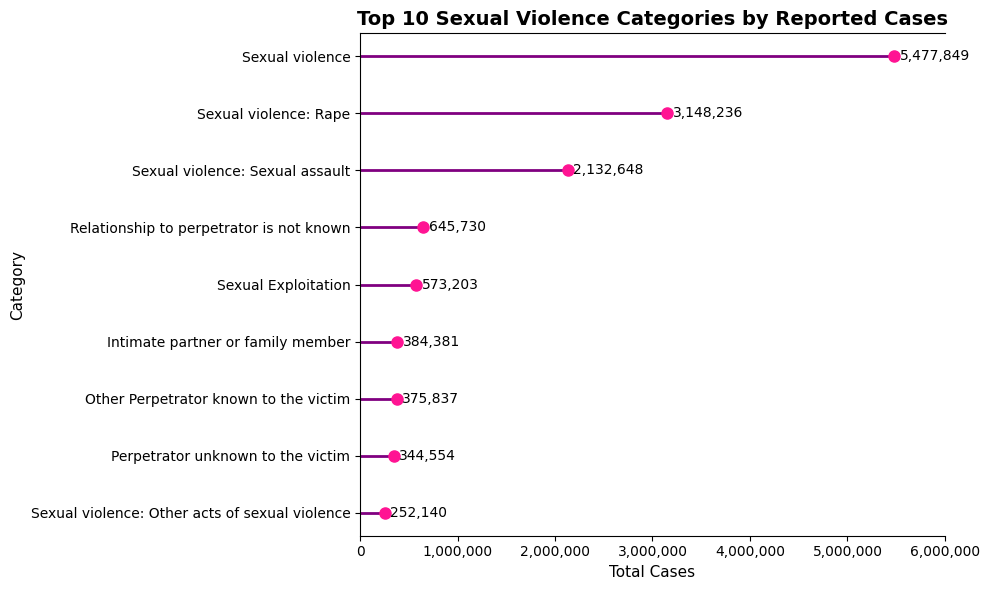

In [ ]:
# Group by Category and sum cases
top_categories = (
    merged_clean.groupby('Category')['Value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Reverse so largest appears at top
top_categories = top_categories[::-1]

plt.figure(figsize=(10, 6))

# Draw the lines
plt.hlines(
    y=top_categories.index,
    xmin=0,
    xmax=top_categories.values,
    color='purple',
    linewidth=2
)

# Draw the pink dots
plt.plot(
    top_categories.values,
    top_categories.index,
    "o",
    markersize=8,
    color='deeppink'
)

# Annotate the values slightly to the right (~0.1 cm ≈ 4 pts)
for value, y in zip(top_categories.values, top_categories.index):
    plt.annotate(
        f"{int(value):,}",
        xy=(value, y),
        xytext=(4, 0),  # 4 points to the right
        textcoords='offset points',
        va='center',
        fontsize=10
    )

# Titles and labels
plt.title("Top 10 Sexual Violence Categories by Reported Cases", fontsize=14, weight='bold')
plt.xlabel("Total Cases", fontsize=11)
plt.ylabel("Category", fontsize=11)

# Clean up x-axis formatting
plt.ticklabel_format(style='plain', axis='x')  # Avoid scientific notation
plt.xticks(ticks=plt.xticks()[0], labels=[f"{int(x):,}" for x in plt.xticks()[0]])
plt.xlim(left=0)  # Remove -1,000,000 from x-axis

# Remove right border
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### Data Preprocessing

In [ ]:
merged_clean.columns


Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension',
       'Category', 'Sex', 'Age', 'Year', 'Unit_of_measurement', 'Value',
       'Source', 'Trafficking_cases'],
      dtype='object')

In [ ]:
merged_clean.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit_of_measurement,Value,Source,Trafficking_cases
30,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,775.0,CTS,400.0
47,HRV,Croatia,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2004,Counts,485.0,CTS,14.0
75,ALB,Albania,Europe,Southern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,89.0,CTS,62.0
78,BEL,Belgium,Europe,Western Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,6047.0,CTS,69.0
81,BLR,Belarus,Europe,Eastern Europe,Violent offences,by type of offence,Sexual violence,Total,Total,2005,Counts,819.0,CTS,365.0


In [ ]:
# View unique values in Age
print("Unique values in 'Age':")
print(merged_clean['Age'].unique())
print("\n")

# View unique values in Source
print("Unique values in 'Source':")
print(merged_clean['Source'].unique())
print("\n")

# View unique values in Unit_of_measurement
print("Unique values in 'Unit_of_measurement':")
print(merged_clean['Unit_of_measurement'].unique())


Unique values in 'Age':
['Total']


Unique values in 'Source':
['CTS' 'CTS/MoI' 'CTS/DMDB' 'CTS/NGO' 'CTS/Computed' 'CTS/PPR'
 'CTS/DATASUS' 'PPR/CTS' 'MoI/CTS' 'DMDB' 'NGO' 'MNS' 'MoI' 'PPR']


Unique values in 'Unit_of_measurement':
['Counts' 'Rate per 100,000 population']


In [ ]:
if merged_clean['Age'].nunique() == 1:
    merged_clean.drop('Age', axis=1, inplace=True)
    print("Dropped 'Age' column since it only contains 'Total'")


Dropped 'Age' column since it only contains 'Total'


C:\Users\Admin\AppData\Local\Temp\ipykernel_2880\3646898926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean.drop('Age', axis=1, inplace=True)


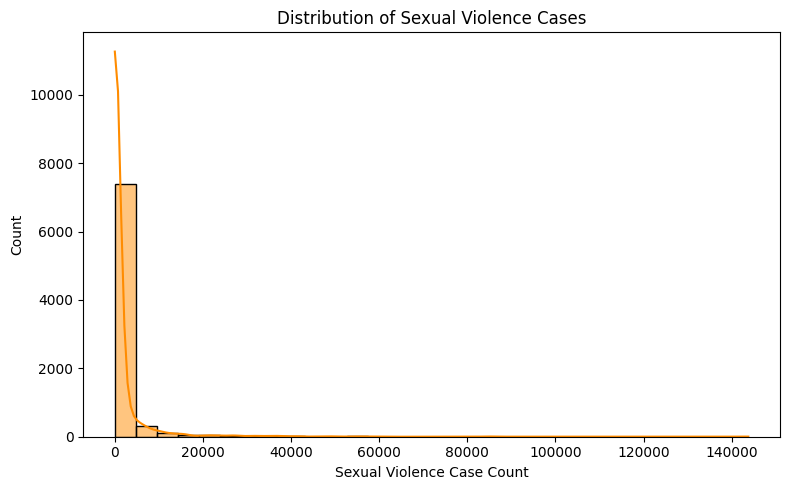

In [ ]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(merged_clean['Value'], bins=30, kde=True, color='darkorange')
plt.title('Distribution of Sexual Violence Cases')
plt.xlabel('Sexual Violence Case Count')
plt.tight_layout()
plt.show()


In [ ]:
print("Skewness of target variable (Value):", merged_clean['Value'].skew())


Skewness of target variable (Value): 10.406700395289107


### **The data is extremely right-skewed.

**Most of the Value counts are low, but a few countries or years report very high cases, stretching the tail.**

**This creates imbalance that can bias models or make them unstable.**

### Using log-transform on my Value column to reduce skewness

C:\Users\Admin\AppData\Local\Temp\ipykernel_2880\446171354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean.loc[:, 'log_Value'] = np.log1p(merged_clean['Value'])  # log1p = log(Value + 1)


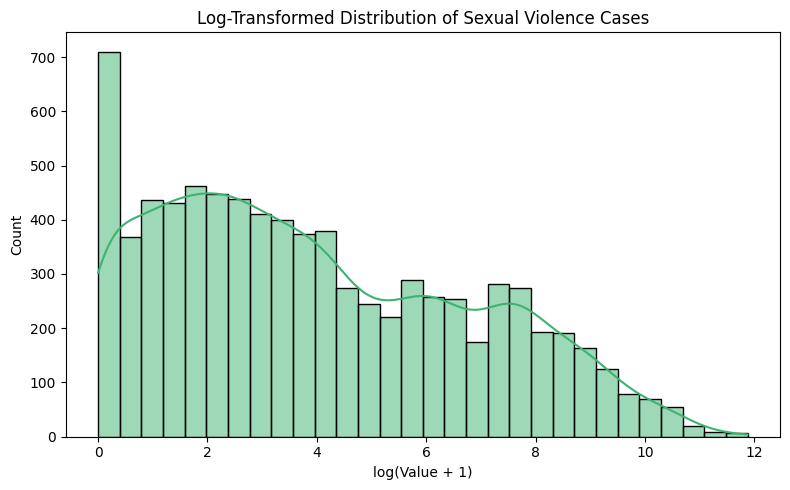

Skewness after log-transform: 0.4616218093458084


In [ ]:
# Create a log-transformed version of the target variable
# Avoid SettingWithCopyWarning using .loc
merged_clean.loc[:, 'log_Value'] = np.log1p(merged_clean['Value'])  # log1p = log(Value + 1)
  # log1p handles zero safely

# Plot the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_clean['log_Value'], bins=30, kde=True, color='mediumseagreen')
plt.title('Log-Transformed Distribution of Sexual Violence Cases')
plt.xlabel('log(Value + 1)')
plt.tight_layout()
plt.show()

# Check skewness again
print("Skewness after log-transform:", merged_clean['log_Value'].skew())


In [ ]:
print(merged_clean['Indicator'].value_counts())


Indicator
Violent offences              5682
Victims of sexual violence    2354
Name: count, dtype: int64


In [ ]:
# Make a copy to avoid changing original dataset
df_encoded = merged_clean.copy()

# One-hot encode 'Sex', 'Indicator' and 'Category'
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'Indicator', 'Category'], drop_first=True, dtype=int)
print("One-hot encoding completed for 'Sex', 'Indicator' and 'Category'")

# Drop columns that won’t be used for modeling
df_encoded.drop(columns=['Source', 'Unit_of_measurement'], inplace=True)
print("Dropped unused columns:'Source', 'Unit_of_measurement'")

# Final check
print("Final dataset shape:", df_encoded.shape)
print("Preview of encoded dataset:")
print(df_encoded.head())


One-hot encoding completed for 'Sex', 'Indicator' and 'Category'
Dropped unused columns:'Source', 'Unit_of_measurement'
Final dataset shape: (8036, 20)
Preview of encoded dataset:
   Iso3_code  Country  Region        Subregion           Dimension  Year  \
30       BLR  Belarus  Europe   Eastern Europe  by type of offence  2004   
47       HRV  Croatia  Europe  Southern Europe  by type of offence  2004   
75       ALB  Albania  Europe  Southern Europe  by type of offence  2005   
78       BEL  Belgium  Europe   Western Europe  by type of offence  2005   
81       BLR  Belarus  Europe   Eastern Europe  by type of offence  2005   

     Value  Trafficking_cases  log_Value  Sex_Male  Sex_Total  \
30   775.0              400.0   6.654153         0          1   
47   485.0               14.0   6.186209         0          1   
75    89.0               62.0   4.499810         0          1   
78  6047.0               69.0   8.707483         0          1   
81   819.0              365.0   6.7093

In [ ]:
df_encoded.head()

,Iso3_code,Country,Region,Subregion,Dimension,Year,Value,Trafficking_cases,log_Value,Sex_Male,Sex_Total,Indicator_Violent offences,Category_Other Perpetrator known to the victim,Category_Perpetrator unknown to the victim,Category_Relationship to perpetrator is not known,Category_Sexual Exploitation,Category_Sexual violence,Category_Sexual violence: Other acts of sexual violence,Category_Sexual violence: Rape,Category_Sexual violence: Sexual assault
30,BLR,Belarus,Europe,Eastern Europe,by type of offence,2004,775.0,400.0,6.654153,0,1,1,0,0,0,0,1,0,0,0
47,HRV,Croatia,Europe,Southern Europe,by type of offence,2004,485.0,14.0,6.186209,0,1,1,0,0,0,0,1,0,0,0
75,ALB,Albania,Europe,Southern Europe,by type of offence,2005,89.0,62.0,4.499810,0,1,1,0,0,0,0,1,0,0,0
78,BEL,Belgium,Europe,Western Europe,by type of offence,2005,6047.0,69.0,8.707483,0,1,1,0,0,0,0,1,0,0,0
81,BLR,Belarus,Europe,Eastern Europe,by type of offence,2005,819.0,365.0,6.709304,0,1,1,0,0,0,0,1,0,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Select only numeric features from your encoded dataset
numeric_features = df_encoded.select_dtypes(include=['int64', 'float64'])

# Drop target columns (if present)
X = numeric_features.drop(columns=['Value', 'log_Value'], errors='ignore')

# Standardize features before calculating VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display sorted VIF values
print(vif_data.sort_values(by="VIF", ascending=False))


                                              Feature       VIF
4                          Indicator_Violent offences       inf
3                                           Sex_Total       inf
10  Category_Sexual violence: Other acts of sexual...       inf
11                     Category_Sexual violence: Rape       inf
8                        Category_Sexual Exploitation       inf
12           Category_Sexual violence: Sexual assault       inf
9                            Category_Sexual violence       inf
2                                            Sex_Male  1.728888
7   Category_Relationship to perpetrator is not known  1.704936
6          Category_Perpetrator unknown to the victim  1.649253
5      Category_Other Perpetrator known to the victim  1.622637
0                                                Year  1.265931
1                                   Trafficking_cases  1.038537


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from statsmodels.tools.tools import add_constant

# Make a fresh copy
df_cleaned = df_encoded.copy()

# Step 1: Reconstruct 'Sex' from dummy columns
def reconstruct_sex(row):
    if row['Sex_Total'] == 1:
        return 'Total'
    elif row['Sex_Male'] == 1:
        return 'Male'
    else:
        return 'Female'  # Assumed if neither Total nor Male is 1

df_cleaned['Sex'] = df_encoded.apply(reconstruct_sex, axis=1)

# Step 2: Drop 'Sex_Total' to reduce multicollinearity
if 'Sex_Total' in df_cleaned.columns:
    df_cleaned.drop(columns=['Sex_Total'], inplace=True)

# Step 3: Recompute Sex_Male and Sex_Female with corrected logic
df_cleaned['Sex_Male'] = df_cleaned['Sex'].apply(lambda x: 1 if x == 'Male' else 0.5 if x == 'Total' else 0)
df_cleaned['Sex_Female'] = df_cleaned['Sex'].apply(lambda x: 1 if x == 'Female' else 0.5 if x == 'Total' else 0)

# Optional: Drop the temporary reconstructed column if not needed
df_cleaned.drop(columns=['Sex'], inplace=True)

# Step 4: Recalculate VIF
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Value', 'log_Value'])
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                                              Feature       VIF
4                          Indicator_Violent offences       inf
3                                            Sex_Male       inf
10  Category_Sexual violence: Other acts of sexual...       inf
11                     Category_Sexual violence: Rape       inf
8                        Category_Sexual Exploitation       inf
9                            Category_Sexual violence       inf
12           Category_Sexual violence: Sexual assault       inf
13                                         Sex_Female       inf
7   Category_Relationship to perpetrator is not known  1.704936
6          Category_Perpetrator unknown to the victim  1.649253
5      Category_Other Perpetrator known to the victim  1.622637
1                                                Year  1.265931
2                                   Trafficking_cases  1.038573
0                                               const  0.000000


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Encode Region, Subregion, and Dimension in df_cleaned
df_cleaned = pd.get_dummies(df_cleaned, columns=['Region', 'Subregion', 'Dimension'], drop_first=True)


In [ ]:
df_cleaned.select_dtypes(include='object').columns


Index(['Iso3_code', 'Country'], dtype='object')

In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns and exclude the target
X = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Value', 'log_Value'], errors='ignore')
X = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort to see the most problematic features
print(vif_data.sort_values(by="VIF", ascending=False))


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              Feature       VIF
4                          Indicator_Violent offences       inf
3                                            Sex_Male       inf
10  Category_Sexual violence: Other acts of sexual...       inf
11                     Category_Sexual violence: Rape       inf
8                        Category_Sexual Exploitation       inf
9                            Category_Sexual violence       inf
12           Category_Sexual violence: Sexual assault       inf
13                                         Sex_Female       inf
7   Category_Relationship to perpetrator is not known  1.704936
6          Category_Perpetrator unknown to the victim  1.649253
5      Category_Other Perpetrator known to the victim  1.622637
1                                                Year  1.265931
2                                   Trafficking_cases  1.038573
0                                               const  0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Make a copy to preserve the original cleaned data
df_scaled = df_cleaned.copy()

# List of columns to exclude from scaling
excluded_columns = ['Value', 'log_Value', 'Trafficking_cases', 'Country', 'Iso3_code']

# Get numeric columns that are NOT excluded
columns_to_scale = [col for col in df_scaled.select_dtypes(include=['float64', 'int64']).columns 
                    if col not in excluded_columns]

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


### Model Selection

In [ ]:
#Importing the necessary models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
# Defining our features and target variables and dropping identifiers 
target = 'log_Value'
identifiers = ['Iso3_code', 'Country', 'Value']  # drop original target and identifiers

X = df_cleaned.drop(columns=[target] + identifiers)
y = df_cleaned[target]


In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Detect numeric and categorical columns automatically
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
        # categorical features should already be encoded, otherwise add OneHotEncoder here
    ],
    remainder='passthrough'  # in case some columns are already numeric but from dummies
)


In [ ]:
#This pipeline has the following steps: scaling and passing the transformed data through a linear regression model
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
#Fitting the model
regression_pipeline.fit(X_train, y_train)
y_pred = regression_pipeline.predict(X_test)


In [ ]:
#Evaluating our Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 6.25
R² Score: 0.22


### **The R² of 0.22 means my model explains only 22% of the variability in log_Value.**
**This is low, meaning my model is not performing well in capturing patterns in the data.**

In [ ]:
#Trying other regression models

# Define your features and target
X = df_cleaned.drop(columns=['log_Value', 'Value', 'Country', 'Iso3_code', 'Trafficking_cases'], errors='ignore')
y = df_cleaned['log_Value']

# Dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
    
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # Using R² as metric
    results[name] = {
        "R² mean": np.mean(scores),
        "R² std": np.std(scores)
    }

# Show results
for model_name, metrics in results.items():
    print(f"{model_name}: R² = {metrics['R² mean']:.3f} ± {metrics['R² std']:.3f}")


LinearRegression: R² = -5.703 ± 3.674
Ridge: R² = -5.703 ± 3.674
Lasso: R² = -5.081 ± 3.368
RandomForest: R² = -6.073 ± 3.946


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

for i in sorted_idx:
    print(f"{features[i]}: {importances[i]:.4f}")


Year: 0.2301
Sex_Female: 0.1144
Category_Sexual violence: 0.1029
Subregion_Western Europe: 0.0876
Region_Americas: 0.0700
Sex_Male: 0.0438
Category_Sexual violence: Other acts of sexual violence: 0.0356
Category_Relationship to perpetrator is not known: 0.0284
Region_Asia: 0.0273
Subregion_Northern Europe: 0.0254
Category_Sexual violence: Sexual assault: 0.0233
Category_Sexual violence: Rape: 0.0232
Category_Sexual Exploitation: 0.0177
Subregion_Southern Europe: 0.0176
Subregion_Eastern Europe: 0.0173
Category_Other Perpetrator known to the victim: 0.0169
Category_Perpetrator unknown to the victim: 0.0165
Region_Oceania: 0.0145
Subregion_Northern America: 0.0141
Subregion_Western Asia: 0.0138
Subregion_Latin America and the Caribbean: 0.0107
Region_Europe: 0.0072
Subregion_South-eastern Asia: 0.0070
Subregion_Northern Africa: 0.0070
Subregion_Eastern Asia: 0.0069
Subregion_Sub-Saharan Africa: 0.0067
Indicator_Violent offences: 0.0047
Dimension_by type of offence: 0.0046
Subregion_Centr

In [ ]:
# Replace this with your actual X, y and importances if you named them differently
X = df_cleaned.drop(columns=['log_Value', 'Value', 'Trafficking_cases', 'Country', 'Iso3_code'])
y = df_cleaned['log_Value']

# Feature importance from previous model
# Replace this with your real `importances` list from the Random Forest model
importances = model.feature_importances_

# ✅ Select important features (importance >= 0.01)
important_features = [feature for feature, importance in zip(X.columns, importances) if importance >= 0.01]
X_important = X[important_features]

# 🔁 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# 🧪 Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# 🚀 Train model
pipeline.fit(X_train, y_train)

# 📈 Predict
y_pred = pipeline.predict(X_test)

# 📊 Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained on {len(important_features)} important features.")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Model trained on 21 important features.
Mean Squared Error: 6.29
R² Score: 0.21


In [ ]:
# === Select the top 21 important features (replace with actual column names from your output) ===
top_features = [
    'Year', 'Sex_Female', 'Category_Sexual violence', 'Subregion_Western Europe',
    'Region_Americas', 'Sex_Male', 'Category_Sexual violence: Other acts of sexual violence',
    'Category_Relationship to perpetrator is not known', 'Region_Asia',
    'Subregion_Northern Europe', 'Category_Sexual violence: Sexual assault',
    'Category_Sexual violence: Rape', 'Category_Sexual Exploitation',
    'Subregion_Southern Europe', 'Subregion_Eastern Europe',
    'Category_Other Perpetrator known to the victim', 'Category_Perpetrator unknown to the victim',
    'Region_Oceania', 'Subregion_Northern America', 'Subregion_Western Asia',
    'Subregion_Latin America and the Caribbean'
]

# === Prepare your features and target ===
X = df_cleaned[top_features]
y = df_cleaned['log_Value']  # Target variable

# === Define models ===
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42)
}

# === Train, cross-validate, and evaluate each model ===
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Cross-validation R²
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name} R² Score: {scores.mean():.3f} ± {scores.std():.3f}")

    # Fit and evaluate on full data (optional)
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name} Final Model -- MSE: {mse:.2f}, R²: {r2:.2f}\n")


Ridge R² Score: -5.700 ± 3.670
Ridge Final Model -- MSE: 6.36, R²: 0.20

Lasso R² Score: -3.108 ± 2.394
Lasso Final Model -- MSE: 7.93, R²: 0.00

RandomForest R² Score: -6.065 ± 3.929
RandomForest Final Model -- MSE: 5.88, R²: 0.26



### **My regression models are overfiting**

### Classification Problem
### Classify countries as "High Risk" or "Low Risk" for trafficking


📌 Model: Logistic Regression
Accuracy: 0.679
F1 Score: 0.681
ROC-AUC: 0.738

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68       808
           1       0.67      0.69      0.68       800

    accuracy                           0.68      1608
   macro avg       0.68      0.68      0.68      1608
weighted avg       0.68      0.68      0.68      1608



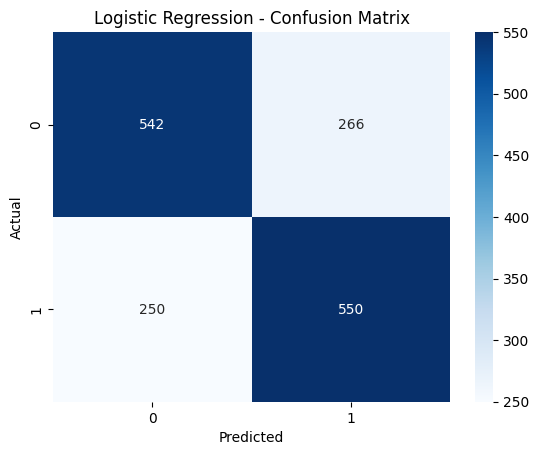


📌 Model: Random Forest
Accuracy: 0.697
F1 Score: 0.700
ROC-AUC: 0.780

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       808
           1       0.69      0.71      0.70       800

    accuracy                           0.70      1608
   macro avg       0.70      0.70      0.70      1608
weighted avg       0.70      0.70      0.70      1608



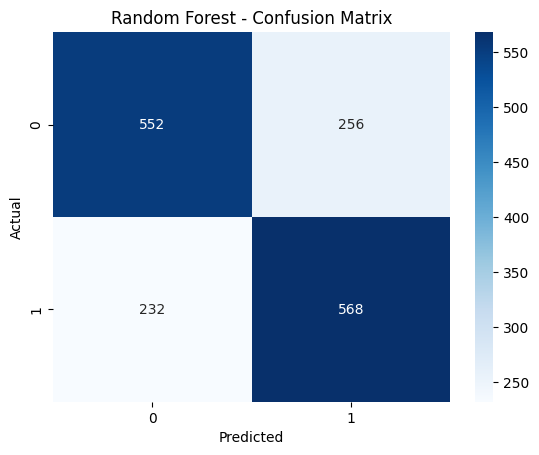


📌 Model: SVM
Accuracy: 0.704
F1 Score: 0.724
ROC-AUC: 0.759

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68       808
           1       0.68      0.78      0.72       800

    accuracy                           0.70      1608
   macro avg       0.71      0.70      0.70      1608
weighted avg       0.71      0.70      0.70      1608



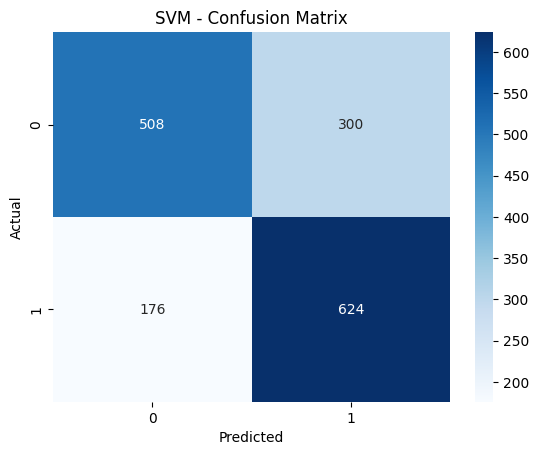

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# 1. --- CREATE BINARY TARGET ---
threshold = df_cleaned['Trafficking_cases'].median()
df_cleaned['High_Risk_Flag'] = (df_cleaned['Trafficking_cases'] > threshold).astype(int)

# 2. --- SELECT FEATURES ---
features = df_cleaned.drop(columns=['Country', 'Iso3_code', 'Trafficking_cases', 'log_Value', 'Value', 'High_Risk_Flag'])
target = df_cleaned['High_Risk_Flag']

# 3. --- TRAIN-TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# 4. --- DEFINE MODELS ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# 5. --- TRAIN & EVALUATE ---
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\n📌 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### **We're creating a binary column:**

**1 if the country has more trafficking cases than the median = High Risk**

**0 otherwise = Low Risk**

### **Dropping unnecessary columns (like identifiers and target columns)**

**features becomes the input (X)**

**target is the binary output (y)**

### **SVM gives the best F1-score and accuracy. It’s performing best at catching high-risk countries.**

**Random Forest is not far behind and might be more interpretable.**

**Logistic Regression is simplest and fast but slightly underperforms.**

C:\Users\Admin\AppData\Local\Temp\ipykernel_2880\1712277697.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2880\1712277697.py:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


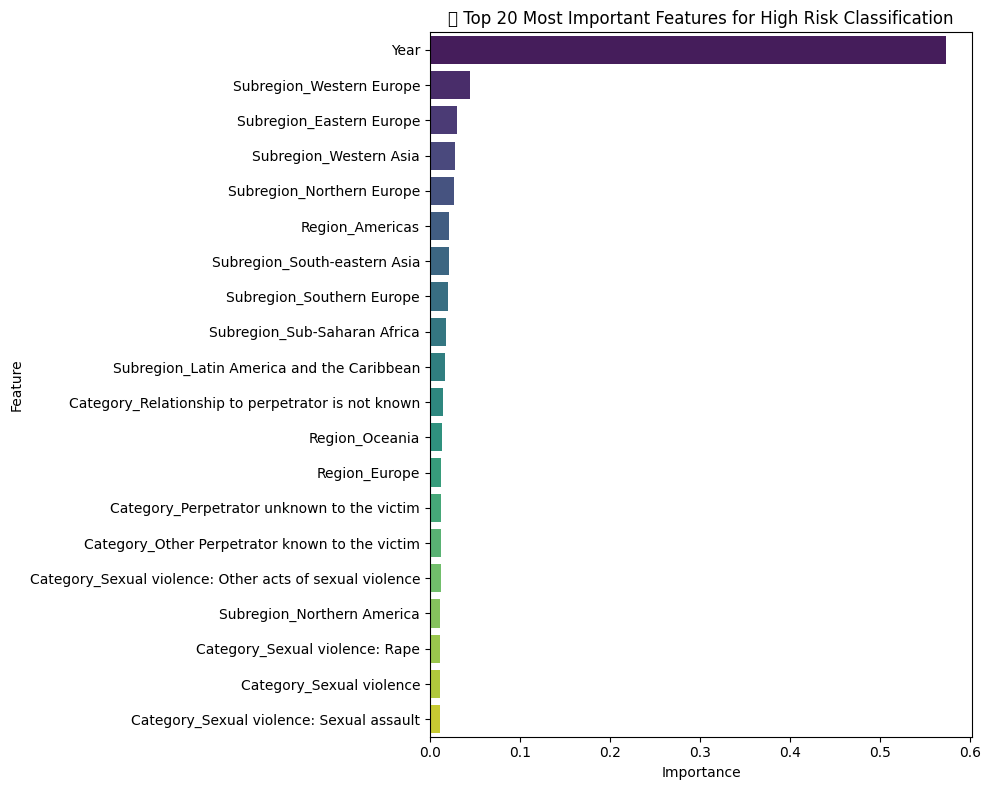

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reuse your cleaned dataset
X = df_cleaned.drop(columns=['Country', 'Iso3_code', 'Trafficking_cases', 'log_Value', 'Value', 'High_Risk_Flag'])
y = df_cleaned['High_Risk_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit model
pipeline.fit(X_train, y_train)

# Extract feature importances
feature_names = X.columns
importances = pipeline.named_steps['rf'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('🔍 Top 20 Most Important Features for High Risk Classification')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define hyperparameter space
param_dist = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

# Set up randomized search
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
search.fit(X_train, y_train)

# Evaluate best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Results
print("🔍 Best Parameters:", search.best_params_)
print("📌 Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Best Parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 10}
📌 Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       808
           1       0.69      0.77      0.72       800

    accuracy                           0.71      1608
   macro avg       0.71      0.71      0.71      1608
weighted avg       0.71      0.71      0.71      1608

ROC-AUC: 0.7979733910891089


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Pipeline for Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Hyperparameter grid
logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

# Grid search
logreg_grid = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Evaluation
best_logreg = logreg_grid.best_estimator_
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]

print("🔹 Best Parameters:", logreg_grid.best_params_)
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred))
print("🔹 ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
🔹 Accuracy: 0.6791044776119403
🔹 F1 Score: 0.6924910607866508
🔹 ROC-AUC: 0.7313521039603961

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       808
           1       0.66      0.73      0.69       800

    accuracy                           0.68      1608
   macro avg       0.68      0.68      0.68      1608
weighted avg       0.68      0.68      0.68      1608



In [ ]:
# from sklearn.svm import SVC

# # Pipeline for SVM
# svm_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', SVC(probability=True, random_state=42))
# ])

# # Hyperparameter grid
# svm_param_grid = {
#     'classifier__C': [0.1, 1, 10],
#     'classifier__kernel': ['linear', 'rbf'],
#     'classifier__gamma': ['scale', 'auto']
# }


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Define pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter grid
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # Manhattan and Euclidean
}

# Grid search with cross-validation
grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Best estimator
best_knn = grid_knn.best_estimator_

# Predict
y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

# Evaluation
print("📌 Model: KNN (Best Params:", grid_knn.best_params_, ")")
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_knn), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_knn), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


📌 Model: KNN (Best Params: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'} )
Accuracy: 0.675
F1 Score: 0.686
ROC-AUC: 0.755

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.66       808
           1       0.66      0.71      0.69       800

    accuracy                           0.68      1608
   macro avg       0.68      0.68      0.68      1608
weighted avg       0.68      0.68      0.67      1608



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipelines
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameter grids
logreg_params = {
    'logreg__C': [0.01, 0.1, 1, 10]
}

rf_params = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20]
}

knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# GridSearch for each
grid_search_logreg = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='f1', n_jobs=-1)

# Fit all
grid_search_logreg.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

# Best models
best_logreg = grid_search_logreg.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_knn = grid_search_knn.best_estimator_

# Compare all models
models = {
    "Logistic Regression": best_logreg,
    "Random Forest": best_rf,
    "KNN": best_knn
}

print("📊 Model Comparison:\n")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"🔹 {name}")
    print(f"   - Accuracy: {accuracy:.3f}")
    print(f"   - F1 Score: {f1:.3f}")
    print(f"   - ROC-AUC: {roc_auc:.3f}\n")


📊 Model Comparison:

🔹 Logistic Regression
   - Accuracy: 0.679
   - F1 Score: 0.681
   - ROC-AUC: 0.738

🔹 Random Forest
   - Accuracy: 0.725
   - F1 Score: 0.738
   - ROC-AUC: 0.803

🔹 KNN
   - Accuracy: 0.674
   - F1 Score: 0.666
   - ROC-AUC: 0.750



### Best Performance:
**Among all your tuned models:**
- Random Forest had the highest Accuracy (0.725), F1 Score (0.738), and ROC-AUC (0.803).
- This indicates it handles both false positives and false negatives better than others.

**Handles Complex Data:**
- Random Forests are non-linear, robust to outliers and automatically handle feature interactions.

**Feature Importance:**-
- They offer built-in feature importance, which helped you reduce irrelevant features and improve performance.
- Less Sensitive to Overfitting (compared to decision trees alone), especially with tuning.

### Brief Analysis of Other Models
- Give a summary of the pros/cons:

**🔹 Logistic Regression**
- Pros: Interpretable, fast.
- Cons: Performed the worst — accuracy (0.679), ROC-AUC (0.738) — likely underfit due to inability to capture complex relationships.

**🔹 KNN**
- Pros: Simple, non-parametric.
- Cons: Accuracy (0.674), F1 (0.666). Sensitive to scaling, struggles in high-dimensional spaces and slow on large datasets.